# Unsupervised Learning

## K - Means

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
import numpy as np

In [2]:
url = "https://raw.githubusercontent.com/lmcanavals/ml/main/data/iris.data"

iris = pd.read_csv(url, header=None)
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
x = iris[[2, 3]].to_numpy()
print(x.shape)

(150, 2)


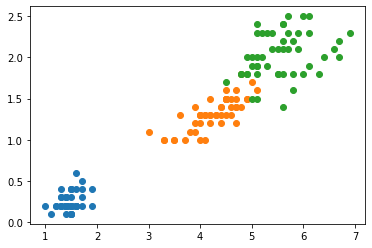

In [4]:
plt.scatter(x[   :50,  0], x[   :50,  1])
plt.scatter(x[ 50:100, 0], x[ 50:100, 1])
plt.scatter(x[100:,    0], x[100:   , 1])

### Distances

In [5]:
def euclidean(p0, p1):
    d = 0
    for x0, x1 in zip(p0, p1):
        d += (x0 - x1)**2

    return d**0.5

In [14]:
assert euclidean([1, 1], [2, 2]) == 2**0.5

In [6]:
def manhattan(p0, p1):
    d = 0
    for x0, x1 in zip(p0, p1):
        d += abs(x0 - x1)

    return d

In [7]:
manhattan([1, 1, 1], [2, 2, 2])

3

In [24]:
class MyKMeans:
    def __init__(self, k, seed=1981, dist=euclidean):
        self.k = k
        self.dist = dist
        self.labels_ = None
        random.seed(seed)

    def fit(self, x):
        rows, dims = x.shape
        limsinf = []
        limssup = []
        for i in range(dims):
            limsinf.append(x[:, i].min())
            limssup.append(x[:, i].max())

        centroids = np.zeros((self.k, dims))
        oldcentroids = np.zeros((self.k, dims))
        for i in range(self.k):
            for j in range(dims):
                centroids[i, j] = random.uniform(limsinf[j], limssup[j])

        #plt.scatter(x[   :50,  0], x[   :50,  1])
        #plt.scatter(x[ 50:100, 0], x[ 50:100, 1])
        #plt.scatter(x[100:,    0], x[100:   , 1])
        #plt.scatter(centroids[:, 0], centroids[:, 1], marker="x")
        while True:
            self.labels_ = np.zeros((rows), dtype=int)
            for i in range(rows):
                low = 0
                lowdist = math.inf
                for j in range(self.k):
                    curdist = self.dist(x[i], centroids[j])
                    if curdist < lowdist:
                        lowdist = curdist
                        low = j
                self.labels_[i] = low

            #print(centroids)
            oldcentroids = centroids.copy()
            for i in range(self.k):
                centroids[i] = np.mean(x[self.labels_ == i], axis=0)

            end = True
            for i in range(self.k):
                if self.dist(centroids[i], oldcentroids[i]) > 1e-10:
                    end = False
                    break

            if end:
                break
        #print(centroids)

        #plt.scatter(centroids[:, 0], centroids[:, 1], marker="x")

In [51]:
model = MyKMeans(3, dist=euclidean)
model.fit(x)
model.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

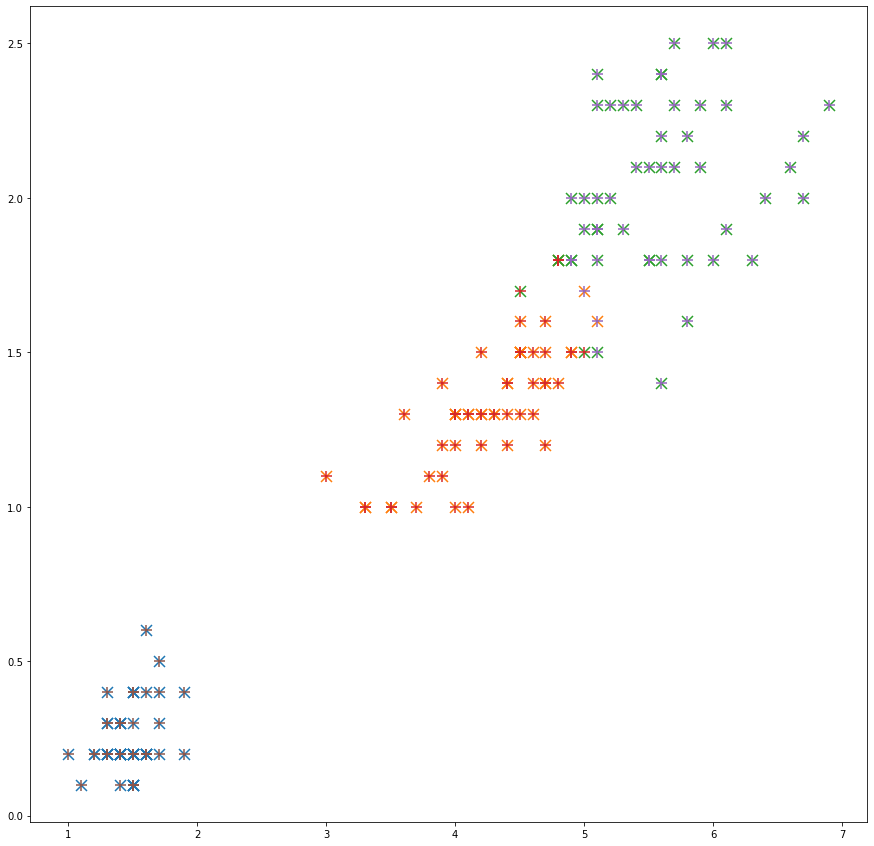

In [52]:
plt.subplots(figsize=(15, 15))
plt.scatter(x[   :50,  0], x[   :50,  1], marker="x", s=11**2)
plt.scatter(x[ 50:100, 0], x[ 50:100, 1], marker="x", s=11**2)
plt.scatter(x[100:,    0], x[100:   , 1], marker="x", s=11**2)
plt.scatter(x[model.labels_==0][:,0], x[model.labels_==0][:,1], marker="+", s=11**2)
plt.scatter(x[model.labels_==1][:,0], x[model.labels_==1][:,1], marker="+", s=11**2)
plt.scatter(x[model.labels_==2][:,0], x[model.labels_==2][:,1], marker="+", s=11**2)

In [53]:
for i in range(3):
    print(len(model.labels_[model.labels_ == i]))

52
48
50


## Using SKLearn

In [49]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3).fit(x)
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [50]:
for i in range(3):
    print(len(kmeans.labels_[kmeans.labels_ == i]))

50
48
52
